## Clustering

This is an unsupervised learning method to find structures in data.  First let's demonstrate with some example data: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2, 
                  random_state=42)

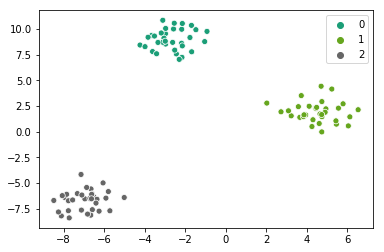

In [3]:
# because matplotlib legend-making is faffy.
import seaborn as sns
sns.scatterplot(X[:,0],X[:,1],hue=y,palette="Dark2");

### K-Means Algorithm

The algorithm goes as follows:
1. Pick a value for K, the number of clusters to find
2. Randomly generate K centers
3. Loop through all the data points and assign them to the cluster they are closest to
4. Update the cluster centers to be at the mean positions of the points in their clusters
5. Repeat steps 3. and 4. until convergence

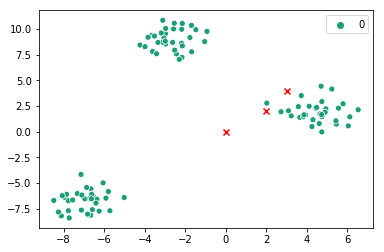

In [4]:
centers = np.array([[3,4],[0,0],[2,2]])
h = np.zeros_like(y)
sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2")
plt.scatter(centers[:,0],centers[:,1],color="r",marker="x");

In [5]:
def distance(point, center):
    return np.sum((point-center)**2)

def get_cluster(point,centers):
    distances = np.array([distance(point,x) for x in centers])
    cluster_index = {distances[0]: 0, distances[1]: 1, distances[2]: 2}
    min_distance = np.min(distances)
    cluster = cluster_index[min_distance]
    return cluster

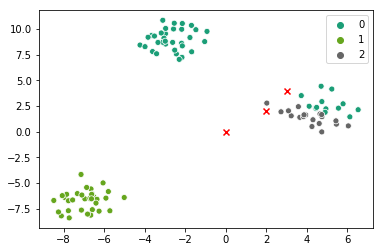

In [6]:
h = np.array([get_cluster(x,centers) for x in X])

sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2")
plt.scatter(centers[:,0],centers[:,1],color="r",marker="x");

In [7]:
def update_centroids(data,labels):
        centroids = np.array([[0,0],[0,0],[0,0]])
        for i in range(3):
            xs = 0.0
            ys = 0.0
            count = 0.0
            for j in range(len(data)):
                if labels[j] == i:
                    count += 1.0
                    xs += data[j,0]
                    ys += data[j,1]
                    
            centroids[i] = np.array([xs/count,ys/count])
            
        return centroids

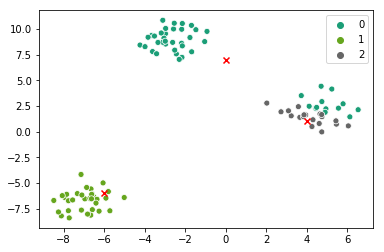

In [8]:
centers = update_centroids(X,h) 
sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2")
plt.scatter(centers[:,0],centers[:,1],color="r",marker="x");

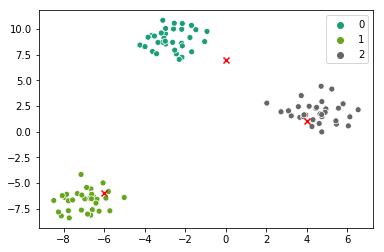

In [9]:
h = np.array([get_cluster(x,centers) for x in X])

sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2")
plt.scatter(centers[:,0],centers[:,1],color="r",marker="x");

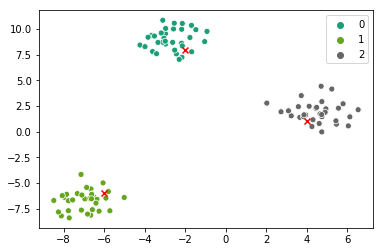

In [10]:
centers = update_centroids(X,h) 
sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2")
plt.scatter(centers[:,0],centers[:,1],color="r",marker="x");

### K-Means Clustering with `scikit-learn`

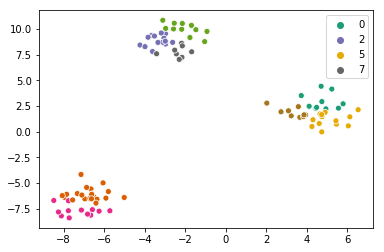

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(X) # default is 8.
h = kmeans.predict(X)
sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2");

#### The *lagom* problem

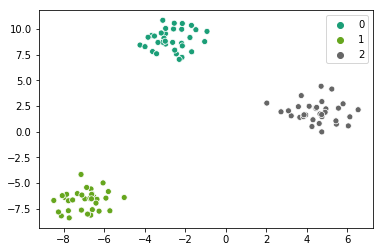

In [12]:
kmeans = KMeans(3).fit(X)
h = kmeans.predict(X)
sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2");

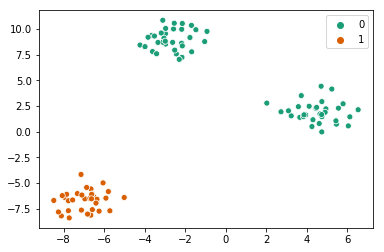

In [13]:
kmeans = KMeans(2).fit(X)
h = kmeans.predict(X)
sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2");

### Other Clustering Algorithms

Affinity propagation is one option for when you don't know the number of clusters in advance.  It looks at the pairwise similarity of points to group them, choosing a few exemplers (like the cluster centroids) from the data set to represent all the data points:

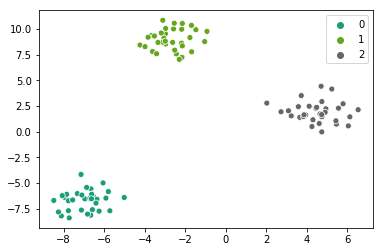

In [14]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(X)
h = af.predict(X)
sns.scatterplot(X[:,0],X[:,1],hue=h,palette="Dark2");

*Danger Warning!* this looks at each pairing of data points so don't attempt with large amount of data (e.g. large images) on your laptop...

For a list of available clustering algorithms see here: http://scikit-learn.org/stable/modules/clustering.html

## Clustering with Image Data

Let's look instead at image data, so first let's generate a grayscale image:

In [15]:
def fake_image(image_size, n_samples):
    gaus_x = np.random.normal(50,10,size=n_samples)
    gaus_y = np.random.normal(25,5,size=n_samples)
    density = np.zeros((image_size,image_size,3))

    for i in range(n_samples):
        density[np.int(gaus_x[i])][np.int(gaus_y[i])][:] += 1.0
    
    density /= density.max()
    data = np.array(list(zip(gaus_x,gaus_y)))
    return data, density

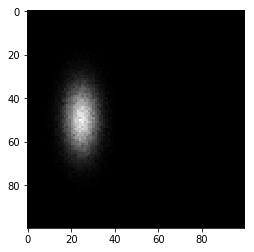

In [16]:
np.random.seed(42)
image_size = 100
n_samples = 100000

data, im = fake_image(image_size,n_samples)

plt.imshow(im);

[ 50.00966868  25.00490517]


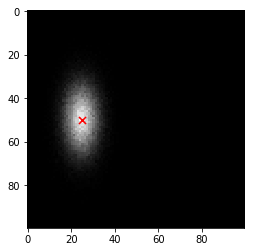

In [17]:
model = KMeans(1).fit(data)
test_points = []
for i in range(100):
    for j in range(100):
        test_points.append([i,j])

centers = model.cluster_centers_
print(centers[0])

plt.imshow(im)
plt.scatter(centers[0][1],centers[0][0],marker='x',s=50,color='r');